# Check Result

In [1]:
import os
import json
import sys
import platform
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

from colorama import Fore

In [3]:
from models.gsgan.Gsgan import Gsgan
from models.leakgan.Leakgan import Leakgan
from models.maligan_basic.Maligan import Maligan
from models.mle.Mle import Mle
from models.rankgan.Rankgan import Rankgan
from models.seqgan.Seqgan import Seqgan
from models.textGan_MMD.Textgan import TextganMmd
from models.seqgan_cap.Seqgan import Seqgan_cap

In [4]:
gan_name = 'seqgan_cap'
image_path = 'G:\\image_caption\\coco\\images'
annotation_file = 'G:\\image_caption\\coco\\annotations\\captions_train2014_type.json'

In [5]:
from utils.pycocotools.coco import COCO
coco = COCO(annotation_file)

loading annotations into memory...
0:00:01.621334
creating index...
index created!


## create image_coco.txt

In [6]:
tt = coco.getAnnIds()
coco.anns[tt[0]]
len(coco.getImgIds())

82783

In [8]:
create_image_coco = False
if create_image_coco:
    image_coco_text = ""
    all_data = []
    num = 10000
    for image_id in tqdm.tqdm(coco.getImgIds()):
        for cap in coco.imgToAnns[image_id]:
            text = cap['caption'].strip().lower()
            if (len(text) > 0):
                all_data.append(str(image_id) + ' ' + text)
    with open('data/image_coco.txt', 'w') as f:
        f.write('\n'.join(all_data[:num]).strip())
    print("Saved. Total lines %d." % num)

# Test

In [9]:
def set_gan(gan_name):
    gans = dict()
    gans['seqgan'] = Seqgan
    gans['gsgan'] = Gsgan
    gans['textgan'] = TextganMmd
    gans['leakgan'] = Leakgan
    gans['rankgan'] = Rankgan
    gans['maligan'] = Maligan
    gans['mle'] = Mle
    gans['seqgan_cap'] = Seqgan_cap
    try:
        Gan = gans[gan_name.lower()]
        gan = Gan()
        gan.vocab_size = 5000
        gan.generate_num = 10000
        return gan
    except KeyError:
        print(Fore.RED + 'Unsupported GAN type: ' + gan_name + Fore.RESET)
        sys.exit(-2)

In [10]:
gan = set_gan(gan_name)
gen_file = gan.generator_file

In [18]:
dict_file = gan.dict_file
with open(dict_file, 'r') as f:
    _data = json.load(f)
i2w = _data['iw']
w2i = _data['wi']

def decode(token_seq):
    result = ' '.join([i2w[t] for t in token_seq if t != str(len(i2w))])
    return result

In [19]:
len(i2w)

4712

In [22]:
data = {}
with open(gen_file, 'r') as f:
    for line in f:
        tmp = line.strip().split()
        data[int(tmp[0])] = decode(tmp[1:])

In [21]:
ids = coco.getImgIds()[:5]
data = {i:str(i) for i in ids}

In [30]:
def cap_show(num=5):
    global image_path
    fig = plt.figure()
    for n, (key, value) in enumerate(data.items()):
        img_file = os.path.join(image_path, coco.imgs[key]['file_name'])
        # display(image_path, value)
        a = fig.add_subplot(num+1, 1, n+1)
        image = mpimg.imread(img_file)
        plt.imshow(image)
        a.set_title(value)
        if n >= num: break
    fig.set_size_inches(np.array(fig.get_size_inches()) * num)
    plt.show()

In [32]:
data

{124240: 'a bun in standing shoulder',
 367835: 'a zebras on .',
 432909: 'a the box table on on a',
 71677: 'a in dirty . a where picture in of there .',
 237645: '',
 147115: 'a from the container are floor in and for a his nose lies onlookers horse sitting',
 184211: 'top with of the on a people sign down a all wearing in fence .',
 14487: 'there selected next .',
 458355: '',
 205067: 'in a woman at on the lines on a wine with the being patio in and a cabin younger man something .',
 98220: 'a with a table .',
 433235: 'a halfpipe .',
 109561: ', the seated instrument .',
 26029: 'in on toilet wooden herd flying in his movie .',
 574492: 'living horses large short wave in a topped in boy has a watching putting .',
 489255: 'banana .',
 532933: 'a women above on person in a house stuck boy woman close a portable on a church . zebras a groom , individual that slides of flying fun',
 442322: 'a piece .',
 561582: 'a baseball airport under blue the takes people a men trying bunch at th

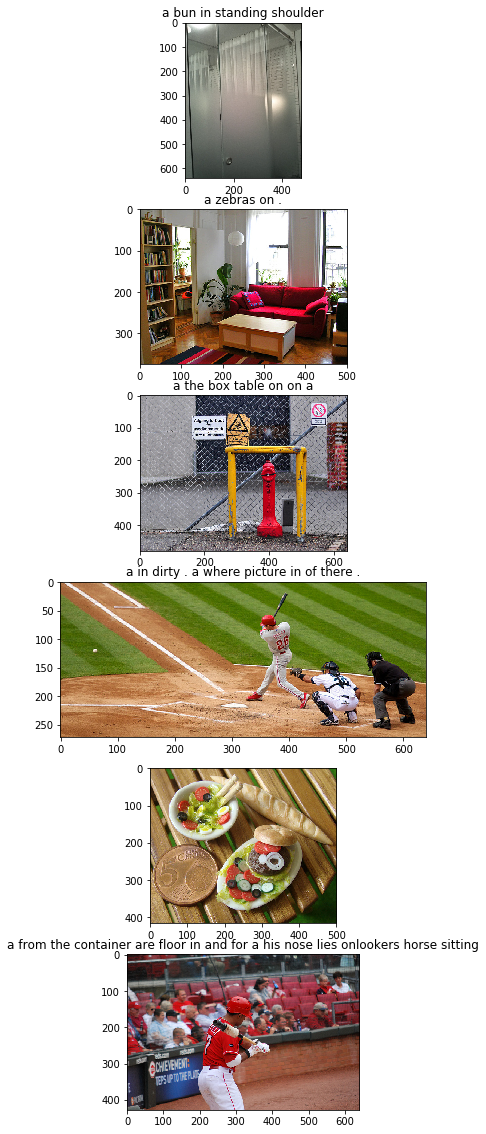

In [31]:
cap_show()